# Generating Data

Let's say we are gonna generate a synthetic data of the number of new visitors to an Emergency Department over time based on the mean number of visitors for that we would need. 

- Create the date range
- Create the random data based on the poisson distribution

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## the date range

- use the `date_range()` function 
- be aware of the american formatting

In [2]:
pd.date_range(start = '1/1/2018', end = '1/08/2018') # this will end up a range of 8 days 

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')

In [3]:
# always use the YYYY/MM/DD format to avoid confusion
pd.date_range(start = '2018/01/01', end = '2018/01/04') 

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04'], dtype='datetime64[ns]', freq='D')

In [5]:
# an hourly range
pd.date_range(start = '2018/01/01', end = '2018/01/04', freq = 'h') 

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00', '2018-01-01 05:00:00',
               '2018-01-01 06:00:00', '2018-01-01 07:00:00',
               '2018-01-01 08:00:00', '2018-01-01 09:00:00',
               '2018-01-01 10:00:00', '2018-01-01 11:00:00',
               '2018-01-01 12:00:00', '2018-01-01 13:00:00',
               '2018-01-01 14:00:00', '2018-01-01 15:00:00',
               '2018-01-01 16:00:00', '2018-01-01 17:00:00',
               '2018-01-01 18:00:00', '2018-01-01 19:00:00',
               '2018-01-01 20:00:00', '2018-01-01 21:00:00',
               '2018-01-01 22:00:00', '2018-01-01 23:00:00',
               '2018-01-02 00:00:00', '2018-01-02 01:00:00',
               '2018-01-02 02:00:00', '2018-01-02 03:00:00',
               '2018-01-02 04:00:00', '2018-01-02 05:00:00',
               '2018-01-02 06:00:00', '2018-01-02 07:00:00',
               '2018-01-

In [6]:
# Let's store this in a variable so we can make it the index of a DataFrame
idx = pd.date_range(start = '2018/01/01', end = '2018/01/04', freq = 'h')

In [7]:
# let's generate some random data to go with this index
rng = np.random.default_rng()

In [9]:
# combine the index and the data into a DataFrame
df = pd.DataFrame(index = idx, data = rng.random(size = len(idx)), columns = ['admission'])
df.head(3)

,admission
2018-01-01 00:00:00,0.122046
2018-01-01 01:00:00,0.886610
2018-01-01 02:00:00,0.931230


- this doesn't look like a proper data as it is impossible to treat 0.1 of a person.
- we need a discrete set of random numbers that match the mean so we can use the poisson distribution

In [32]:
mean_admission = 15

`poisson(lam = 'the_mean', size = 'number_to_return')`

In [33]:
df = pd.DataFrame(index = idx, data = rng.poisson(lam = mean_admission, size = len(idx)), columns = ['admission'])
df.head(3)

,admission
2018-01-01 00:00:00,14
2018-01-01 01:00:00,13
2018-01-01 02:00:00,9


<Axes: xlabel='None', ylabel='admission'>

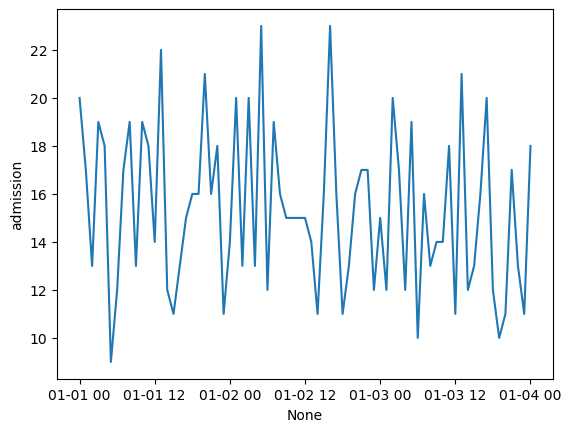

In [22]:
# let's plot this data
sns.lineplot(data = df, x = df.index, y = 'admission')

In [23]:
df['admission'].mean()

15.342465753424657

### This does not take into account the time of the dat

we can pass in an array into `lam` to reflectthe changing avarage throughout the day

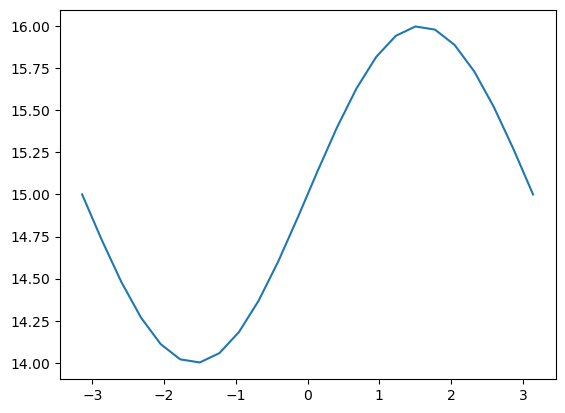

In [26]:
x = np.linspace(-np.pi, np.pi, 24)
means = np.sin(x) + 15
plt.plot(x, means)

so this gives us a good wave of admission as during the nught time admissions go down and during the day time it goes up again and again

In [27]:
df = pd.DataFrame(index = idx, data = rng.poisson(lam = means, size = len(idx)), columns = ['admission'])

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (73,) and arg 1 with shape (24,).

In [28]:
len(idx)

73

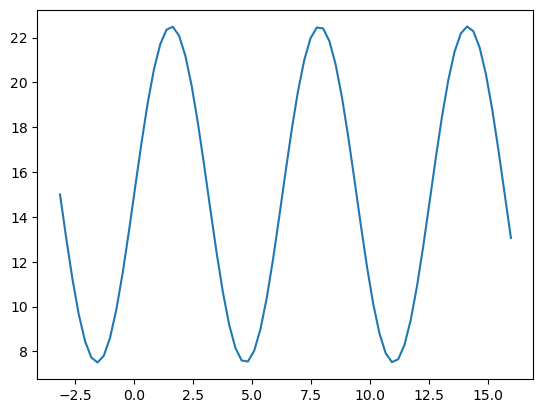

In [40]:
# x = np.linspace(-np.pi, np.pi, len(73))
number_of_days = len(idx) / 24
multiplier = (number_of_days * 2) - 1
x = np.linspace(-np.pi, multiplier * np.pi, len(idx))
admission_means = (np.sin(x) * (mean_admission / 2)) + mean_admission
plt.plot(x, admission_means)

In [41]:
df = pd.DataFrame(index = idx, data = rng.poisson(lam = admission_means, size = len(idx)), columns = ['admission'])
df.head(3)

,admission
2018-01-01 00:00:00,18
2018-01-01 01:00:00,16
2018-01-01 02:00:00,13


<Axes: xlabel='None', ylabel='admission'>

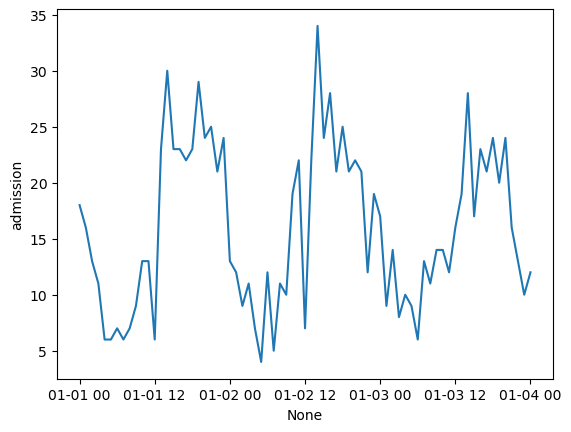

In [42]:
sns.lineplot(data = df, x = df.index, y = 'admission')

## END